In [1]:
#independent (Independent)
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
df = pd.read_csv('dataset_malwares.csv');

In [2]:
#independent (Constant )

benign = df[df['Malware'] == 0]
malicious = df[df['Malware'] == 1]
# Oversample benign instances
benign_oversampled = resample(benign,replace=True,n_samples=len(malicious),random_state=42) 

# Combine oversampled benign with original malicious
df_oversampled = pd.concat([benign_oversampled, malicious])
class_distribution = df_oversampled['Malware'].value_counts()
#print("Class Distribution:\n", class_distribution) #OUTPUTS 14599 for both classes
used_features = df_oversampled.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(used_features , df_oversampled['Malware'] , test_size=0.20, random_state=42);


In [3]:
from sklearn.linear_model import LogisticRegression;
classifier = LogisticRegression( solver='liblinear',max_iter=3000);
classifier.fit( X_train,y_train);

In [4]:
y_pred = classifier.predict(X_test);

Accuracy: 50.72%
              precision    recall  f1-score   support

      Benign       0.98      0.02      0.04      2932
     Malware       0.50      1.00      0.67      2908

    accuracy                           0.51      5840
   macro avg       0.74      0.51      0.35      5840
weighted avg       0.74      0.51      0.35      5840



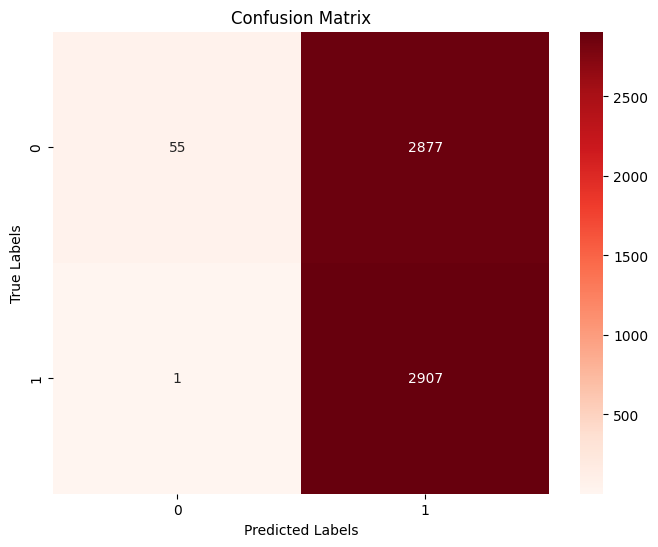

In [5]:
from sklearn.metrics import accuracy_score, classification_report;
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#K-Fold Cross validation
# from sklearn.model_selection import cross_val_score
# X = df.drop(['Malware','Name'],axis = 1) 
# y = df['Malware']
# k  = 20 #Folds
# scores = cross_val_score(classifier, X, y, cv=k, scoring='accuracy')

# print("Cross-Validation Scores for each fold:", scores)
# print("Mean Accuracy:", scores.mean())
# print("Standard Deviation:", scores.std())

In [ ]:
import time #To measure the training and inference time
import psutil # To monitor memory usage.
from memory_profiler import memory_usage #For detailed memory profiling

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import accuracy_score, classification_report;

def run_model():
    # Measure memory usage
    mem_before = psutil.virtual_memory().used / (1024 ** 2)  # Memory in MB

    # Start time for training
    start_train_time = time.time()
    model = LogisticRegression( solver='liblinear',max_iter=3000);
    model.fit( X_train,y_train);
    end_train_time = time.time()

    # Time to make predictions
    start_pred_time = time.time()
    y_pred = model.predict(X_test)
    end_pred_time = time.time()

    # Memory after model training and inference
    mem_after = psutil.virtual_memory().used / (1024 ** 2)  # Memory in MB

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    train_time = end_train_time - start_train_time
    inference_time = end_pred_time - start_pred_time
    memory_consumption = mem_after - mem_before

    # Display results
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Inference Time: {inference_time:.4f} seconds")
    print(f"Memory Consumption: {memory_consumption:.2f} MB")

# Profile the model
memory_profile = memory_usage(run_model, interval=0.1, timeout=None)

# Plot memory usage over time
import matplotlib.pyplot as plt
plt.plot(memory_profile)
plt.title("Memory Usage Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Memory Usage (MB)")
plt.show()